<a href="https://colab.research.google.com/github/OhDyy/Ohdy/blob/main/%EC%8B%9C%EA%B0%84%EC%97%90_%EB%94%B0%EB%A5%B8_Ca_%ED%9D%A1%EC%B0%A9%EB%9F%89_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://drive.google.com/file/d/1FZrc9Krn92z2e0qngjIGoXAaR75cFCxS/view?usp=drive_link

In [2]:
install.packages(c("tidyverse", "caret", "e1071", "Hmisc"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘checkmate’, ‘htmlwidgets’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘proxy’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘Formula’




In [3]:
library(tidyverse)
library(data.table)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [4]:
library(repr)
options(repr.plot.sidth=10, repr.plot.height=7)

In [5]:
#https://drive.google.com/file/d/1FZrc9Krn92z2e0qngjIGoXAaR75cFCxS/view?usp=drive_link
system("gdown --id 1FZrc9Krn92z2e0qngjIGoXAaR75cFCxS")
system("ls",TRUE)

[1] "Ca Kinetics.csv" "sample_data"

In [20]:
DF <- read.csv("Ca Kinetics.csv", encoding = "EUC-KR", header=TRUE,na.strings=".")
DF %>% show()

  time Absorbed.amount
1    1           14.75
2    2           18.19
3    3           21.27
4    4           23.37
5    5           23.88
6    6           24.35


In [9]:
library(Hmisc)


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




In [10]:
library(caret)
set.seed(31)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [21]:
show(DF)

  time Absorbed.amount
1    1           14.75
2    2           18.19
3    3           21.27
4    4           23.37
5    5           23.88
6    6           24.35


In [33]:
x = c(1,2,3,4,5,6) #Time
y = c(14.75,18.19,21.27,23.37,23.88,24.35) #Ca Absorbed amount
m = lm(y ~ x)
m


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     14.251        1.919  


In [16]:
summary(m)


Call:
lm(formula = y ~ x)

Residuals:
       1        2        3        4        5        6 
-1.42048  0.10038  1.26124  1.44210  0.03295 -1.41619 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14.2513     1.2920  11.030 0.000384 ***
x             1.9191     0.3318   5.785 0.004437 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.388 on 4 degrees of freedom
Multiple R-squared:  0.8932,	Adjusted R-squared:  0.8665 
F-statistic: 33.46 on 1 and 4 DF,  p-value: 0.004437


시간에 따른 Ca의 흡착량 분석 선형회기 분석 y = 1.919x + 14.251
유의수준 : 0.05 p-value : 0.004437으로 유의수준 > p-value임으로 대립가설이 성립하고 시간과 Ca의 흡착량은 서로 관계가 있다고 볼 수 있다.

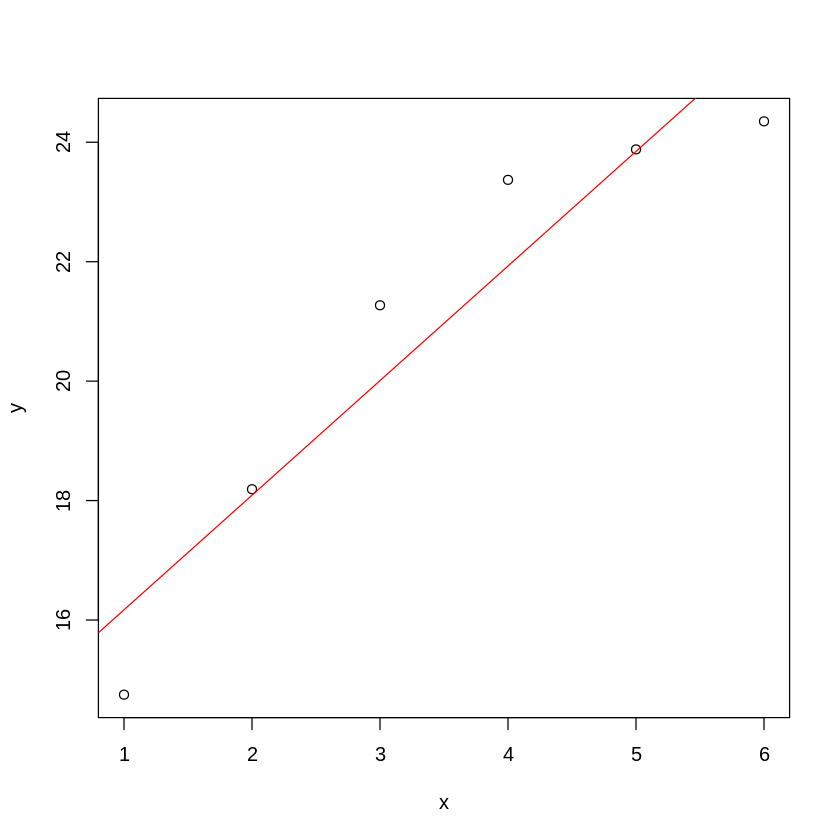

In [41]:
plot(x, y)
abline(m, col = 'red', cex =2, pch=20)

In [39]:
newx = data.frame(x=c(7,8,9))
predict(m,newdata = newx)

1        2        3 
27.68533 29.60448 31.52362

이후 7,8,9 시간 이후의 Ca 흡착량을 예측했을때 7시간일때는 27.69mg 8시간일때는 29.60mg 9시간일때는 31.52mg으로 예측하였다.